# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application of using BeautifulSoup to do webscrapping project. 

## Background

Cryptocurrency has been gaining popularity recently. One of the cryptocurrency that has attracted investor is Ethereum. Ethereum is a decentralized, open-source blockchain with smart contract functionality. Ether is the native cryptocurrency of the platform. Amongst cryptocurrencies, Ether is second only to Bitcoin in market capitalization (wikipedia). This project tried to capture the volatility of ethereum's volume transaction for the past year from Januari 2020 to June 2021. The Data for this project were scrapped from this https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel. We scrapped the data, cleaned, did the analysis and conclude insight for the ethereum's volume transaction. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.d

In [2]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so we can see what we exactly get, in here I slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [32]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":2,"applicationTime":230,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. To find the right key, we have to inspect element of the our resources website. Here, I use `tbody` as the key to get the whole information of the table that we want to scrap.

In [4]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


From the `table` above, we want to scrap two information such as date and volume. We can see that the right key to get the date is `<th class="font-semibold text-center" scope="row">`. So, we use `find_all()` to get all of the rows that we want. Furtermore, we will also use key  `<td class="text-center">` to get the volume. 

In [5]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

For the scrapping  process, to get the volume, notice that market cap, volume, open, and close is collected as a list here. Notice that the volume are in the index no 1, 5, 9, 13, etc.... We will use this information later in looping process. 

In [6]:
table.find_all('td', attrs={'class':'text-center'})[5]

<td class="text-center">
$30,629,329,806
</td>

Finding row length.

In [7]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length
row[1]

<th class="font-semibold text-center" scope="row">2021-06-29</th>

In [8]:
table.find_all('td')[4]

<td class="text-center">
$243,040,539,437
</td>

In [12]:
temp = [] #init

for i in range(1, row_length):
    
    #get date 
    date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text

    #get volume 
    volume = table.find_all('td', attrs={'class':'text-center'})[i * 4 + 1].text
    volume = volume.strip() #to remove excess white space
    
    temp.append((date,volume)) 
temp[:20]

[('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438')]

Do the scrapping process here (please change this markdown with your explanation)

In [11]:
temp = temp[::-1]
temp[:10]

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [19]:
import pandas as pd

df = pd.DataFrame(temp, columns= ('date', 'volume'))
df.head()

,date,volume
0,2021-06-29,"$30,629,329,806"
1,2021-06-28,"$24,316,408,028"
2,2021-06-27,"$24,249,510,321"
3,2021-06-26,"$25,981,381,067"
4,2021-06-25,"$22,447,489,242"


We can see  that the data is not tidy and we need a little bit of cleaning. We checked the types of data for every column. We indentify that date and volume were not in the right type of data. Therefore, we changed the type of data as datetime and type of volume as float. But before that, we need to get rid the $ sign and `,` from the volume column. 

In [20]:
# check types of data for every columns 
df.dtypes

date      object
volume    object
dtype: object

In [21]:
# let omit $ from the volume 
df['date'] = df['date'].astype('datetime64')
df['volume'] = df['volume'].map(lambda x: x.lstrip('$'))
df['volume'] = df['volume'].str.replace(",","")
df['volume'] = df['volume'].astype('float64')

In [22]:
# final check for data types and nan value 
df.isna().sum()
df.dtypes
# df.info()

date      datetime64[ns]
volume           float64
dtype: object

Data visualisation\
We have cleaned time series data of the ethereum volume transaction. We want to know the volatility of the volume from month to month. Thus, we create a line plot to get the information that we wanted. Remember to set the index before making the plot.

In [23]:
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

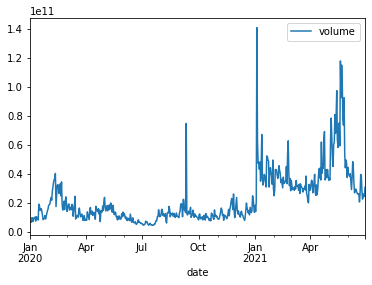

In [24]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


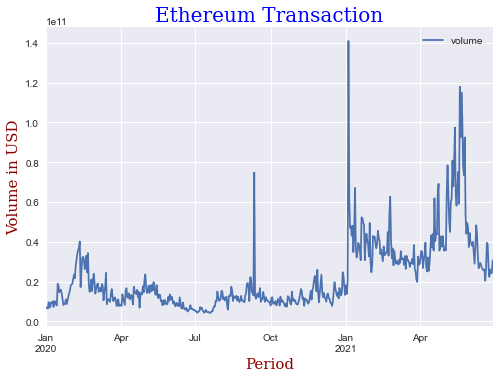

In [25]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}



ax = df.plot()
ax.set_ylabel("Volume in USD", fontdict=font2)
ax.set_title("Ethereum Transaction", fontdict=font1)
ax.set_xlabel("Period", fontdict=font2)
plt.show()


There are several insights that we can get from the line plot above: 
- 1. The volume of sales has been fluctuated from month to month 
- 2. There are two extreme spike of volume which are around September 2020 and Jan 2021 
- 3. The average of the monthly sales is lower during 2020 compare to the monthly sales on 2021
- 4. There were an increase of volume transaction since April 2021 and drop significantly after that 
- 5. In conclusion, the average of volume transaction is increasing  from 2020 to 2021 but the monthly transaction has been fluctuating significantly from time to time. 

We need further investigation to know the reason behind the extraordinary spike in ethereum sales  on September 2020 and Januari 2021. 